# Face Detection using OpenCV Haar Classifier

In this tutorial, we will use OpenCV Haar Classifier to detect faces in an image. The first step is to import the `cv2` module which is used for our detection and the `pylab` environment to save the image in `numpy` array and display the image using function from `matlabplot`.

In [1]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


We will load the image using `imread` function and store the image in an array named `im`. We will also convert our image into grayscale and store it in 2-D `gray` array. We will also display `im` and `gray`.

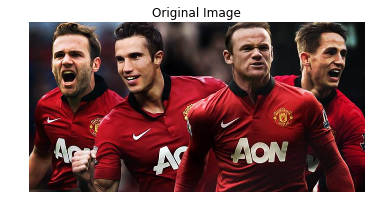

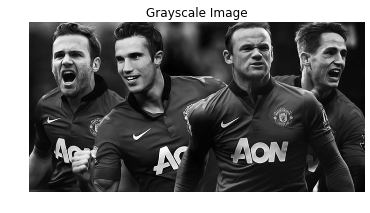

In [2]:
im = imread("/home/bikz05/Desktop/Manchester-United.jpg")
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
title("Original Image")
axis("off")
imshow(im)
show()

title("Grayscale Image")
axis("off")
imshow(gray, cmap= pylab.gray())
show()

The next step is loading the Haar Classifier file. Each classifer is trained with hundreds and thousands of images of a particular kind of object which needs to be detected. We can train a classifer to detect cars, faces, humans, eyes, bottles etc. Since, we are interested in face detection, we will use the OpenCV Classifer for face detection. The classifers are `xml` files that hold the data required to detect faces. All the classifiers that OpenCV provides are available in `<path to OpenCV>/data/haarcascades/` directory. We will use `haarcascade_frontalface_default.xml` and load it using the `cv2.CascadeClassifier` class.

In [3]:
cascadePath = "/home/bikz05/Desktop/SNA_work/opencv-2.4.9/data/haarcascades/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

The next step is to detect faces in our image. The `cv2.CascadeClassifier.detectMultiScale` function is used to detect faces and after computation, it returns a `numpy` array where the co-ordinates of the faces in the image are stored. The function is called `detectMultiScale` because it can detect objects at multiple scales. After each level the classifier will resize the image based on the scale provided to detect the object. If the number of levels that the cascade is trained for are exhausted, then the object is not detected. 
The signature of the function is -
```
cv2.CascadeClassifier.detectMultiScale(image, rejectLevels, levelWeights[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize[, outputRejectLevels]]]]]])
```
Here, 

> 1. image – Matrix of the type CV_8U containing an image where objects are detected.
> 2. objects – Vector of rectangles where each rectangle contains the detected object.
> 3. scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
> 4. minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
> 5. flags – Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
> 6. minSize – Minimum possible object size. Objects smaller than that are ignored.
> 7. maxSize – Maximum possible object size. Objects larger than that are ignored.

For more details, check the [official documentation](http://docs.opencv.org/modules/objdetect/doc/cascade_classification.html?highlight=detectmultiscale#cascade-classification)

In [4]:
faces = faceCascade.detectMultiScale(im)

Let's check how many faces we detected. 

In [5]:
print "Number of faces found ->", faces.shape[0]

Number of faces found -> 4


Each row in the `faces` array contains the location of co-ordinate of a single face.  [x co-ordinate of face, y co-ordinate of face, width of face, height of face]. We will draw a rectangle around each face. We use the `cv2.rectangle` function to draw a rectangle whose boundaries are white in color and width is 3 pixel.

In [6]:
for (x, y, w, h) in faces:
    cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 3)

The next step is to display the image. We will hide the axis by setting it `off`. 

NameError: name 'im' is not defined

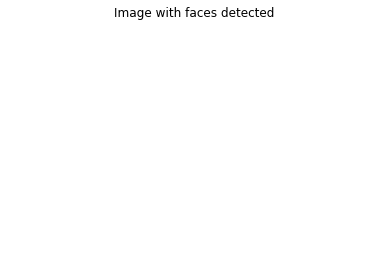

In [2]:
title("Image with faces detected")
axis("off")
imshow(im)
show()

## OPENCV CAVEAT

OpenCV stores an image in BGR format and matplotlib interprets it in RGB format. So, while mixing both you should take care wrt it. You can change the format by using the command(s) below whenever needed - 
```python
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # BGR to RGB format
``` 
```python
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR) # RGB to BGR format
``` 

So, that's it. We successfully detected faces in our image !!
    

In [ ]:
%%html

